<a href="https://colab.research.google.com/github/earo12/Case-Study-ANN/blob/main/ANN_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, auc

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

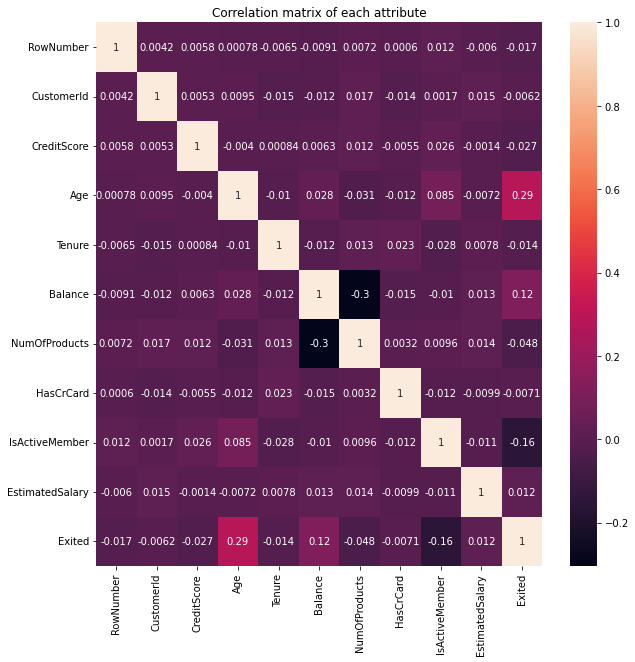

In [38]:
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation matrix of each attribute')
plt.show()

In [ ]:
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough' )#Here we want to change the second column of X
X = np.array(ct.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()

In [13]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [14]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [15]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.4980 - accuracy: 0.7922
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7964
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.7999
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8070
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.8091
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8135
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8155
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8169
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8185
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4189 - accura

In [21]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
print(ann.predict(sc.transform([[0, 0, 1, 5690, 0, 33, 1, 7000, 7, 1, 0, 434317]])) > 0.5)
print(ann.predict(sc.transform([[0, 1, 0, 4210, 1, 57, 7, 90000, 3, 0, 0, 817123]])) > 0.5)

1/1 [==============================] - 0s 58ms/step
[[False]]
1/1 [==============================] - 0s 119ms/step
[[ True]]
1/1 [==============================] - 0s 40ms/step
[[False]]


In [25]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

63/63 [==============================] - 0s 3ms/step
[[1504   91]
 [ 185  220]]


0.862